**Importando base de dados**

In [3]:
import pandas as pd

dados = pd.read_csv('data/analise_de_risco.csv', sep=';')

dados.head()

,id_pessoa,idade_pessoa,salario_ano_pessoa,propriedade_pessoa,anos_trabalhados_pessoa,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,id_historico,verifica_inadimplencia,tempo_primeira_solicitacao
0,F9a6bBd9-Xe2o,27,68000,Aluguel,4.0,8HuvzhAq-k7Xi,Melhora_do_lar,A,8700,7.88,0,0.13,L42AQtMx-SEGR,N,5
1,RSQpYv0W-D6Oo,24,12600,Aluguel,2.0,PDpdl2hQ-Sszr,Empreendimento,C,2500,13.11,1,0.20,oZ2iPvfD-HdIo,Y,2
2,bRYeof0L-cqHI,30,100000,Aluguel,13.0,0T2YFLWb-IZze,Pagamento_debitos,A,12000,7.88,0,0.12,0Y1a64ag-4RLW,N,9
3,d0YRlkdZ-nuLT,28,83000,Hipoteca,6.0,xzTEiD3e-BbFZ,Pagamento_debitos,B,5000,0.00,0,0.06,Z5LA433k-5vqf,N,9
4,njGBnugm-85Dv,30,110400,Aluguel,1.0,QKDlpIm7-sqMC,Empreendimento,D,14000,16.89,1,0.13,ObEkaKZr-9MDa,N,6


### 1. Remoção de Dados Nulos

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pessoa                      34485 non-null  object 
 1   idade_pessoa                   34485 non-null  int64  
 2   salario_ano_pessoa             34485 non-null  int64  
 3   propriedade_pessoa             34154 non-null  object 
 4   anos_trabalhados_pessoa        34485 non-null  float64
 5   id_emprestimo                  34485 non-null  object 
 6   motivo_emprestimo              34174 non-null  object 
 7   pontuacao_emprestimo           34176 non-null  object 
 8   valor_emprestimo               34485 non-null  int64  
 9   taxa_juros_emprestimo          34485 non-null  float64
 10  status_inadimplencia           34485 non-null  int64  
 11  percentual_emprestimo_salario  34485 non-null  float64
 12  id_historico                   34485 non-null 

In [5]:
dados = dados.dropna(axis = 0)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33360 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pessoa                      33360 non-null  object 
 1   idade_pessoa                   33360 non-null  int64  
 2   salario_ano_pessoa             33360 non-null  int64  
 3   propriedade_pessoa             33360 non-null  object 
 4   anos_trabalhados_pessoa        33360 non-null  float64
 5   id_emprestimo                  33360 non-null  object 
 6   motivo_emprestimo              33360 non-null  object 
 7   pontuacao_emprestimo           33360 non-null  object 
 8   valor_emprestimo               33360 non-null  int64  
 9   taxa_juros_emprestimo          33360 non-null  float64
 10  status_inadimplencia           33360 non-null  int64  
 11  percentual_emprestimo_salario  33360 non-null  float64
 12  id_historico                   33360 non-null 

### 2. Tratamento de Outliers

In [7]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33360.000000,3.336000e+04,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,27.561721,6.564681e+04,4.628567,9529.754197,9.893280,0.216457,0.169135,5.807374
std,6.698419,6.174520e+04,4.159946,6348.596166,4.523957,0.411835,0.107204,4.057953
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.827100e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Na primeira coluna 'idade_pessoa' notamos que o valor maximo é de 144 anos e o valor mínimo 0 anos. Isso representa claramente outliers em nossa base de dados.

<AxesSubplot:>

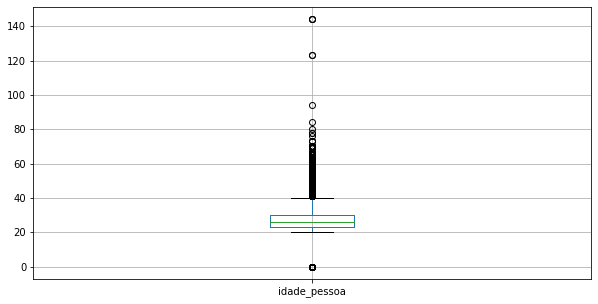

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
dados.boxplot(column = ['idade_pessoa'])

Pelo BoxPlot é possível notar uma grande quantidade de pessoas com idade = 0 e acima dos 85 anos já parecem estar muito longe dos dados comuns que temos. Visto isso, iremos tratar para não afetar nosso modelo

In [36]:
dados_idade_out = dados.loc[dados.idade_pessoa > 18]
dados_idade_out2 = dados_idade_out.loc[dados_idade_out.idade_pessoa < 85]

<AxesSubplot:>

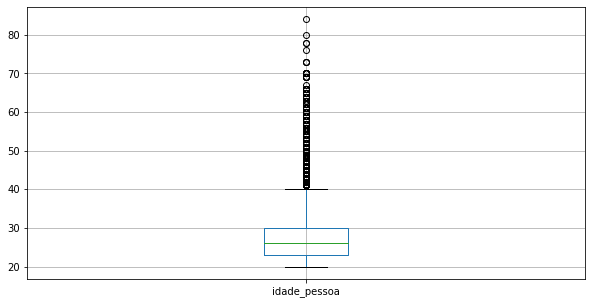

In [38]:
plt.figure(figsize=(10,5))
dados_idade_out2.boxplot(column = ['idade_pessoa'])

Agora ja temos uma melhora na dispersão de dados comparado com anteriormente

In [43]:
dados_idade_out2.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33146.000000,3.314600e+04,33146.000000,33146.000000,33146.000000,33146.000000,33146.000000,33146.000000
mean,27.716376,6.554003e+04,4.632746,9535.114343,9.902509,0.216678,0.169280,5.801092
std,6.201413,5.253935e+04,4.158681,6343.415706,4.516430,0.411987,0.107184,4.048721
min,20.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

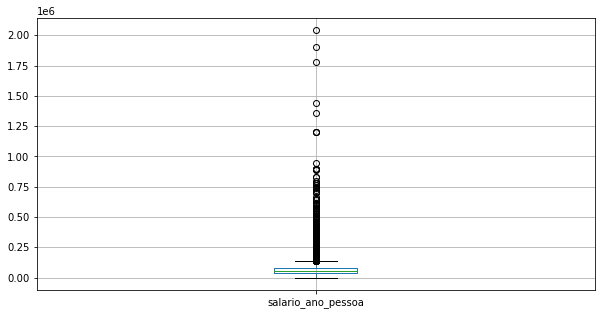

In [83]:
plt.figure(figsize=(10,5))
dados_idade_out2.boxplot(column = ['salario_ano_pessoa'])

Pode ser visto que acima de poucas pessoas posuem o salario acima dos 1 milhão anuais e pessoas que não ganham nenhum salário anual parece não fazer sentido para o que queremos. Iremos tratar isso !

In [60]:
dados_salario_ano = dados_idade_out2.loc[dados_idade_out2.salario_ano_pessoa < 1000000]
dados_salario_ano2 = dados_salario_ano.loc[dados_salario_ano.salario_ano_pessoa > 0]

<AxesSubplot:>

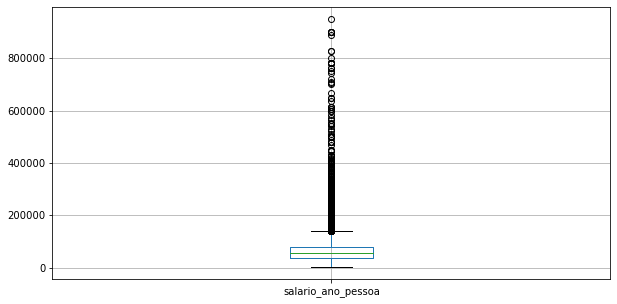

In [84]:
plt.figure(figsize=(10,5))
dados_salario_ano2.boxplot(column = ['salario_ano_pessoa'])

In [63]:
dados_salario_ano2.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000
mean,27.713281,65516.216268,4.635763,9544.211173,9.912245,0.217147,0.169393,5.798441
std,6.192305,47099.566872,4.158444,6340.027808,4.507023,0.412310,0.107037,4.046236
min,20.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

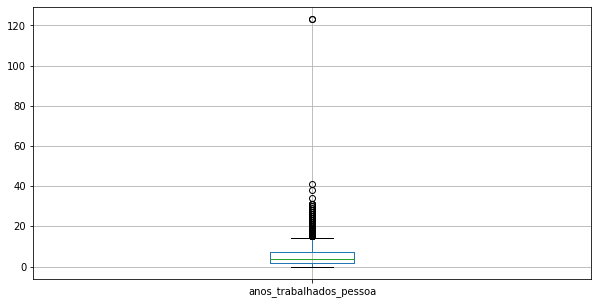

In [85]:
plt.figure(figsize=(10,5))
dados_salario_ano2.boxplot(column = ['anos_trabalhados_pessoa'])

Vemos que temos um dado acima de 120 anos de trabalho, o que é impossível. Iremos remover esse dado.

In [67]:
dados_anos_trabalhados = dados_salario_ano2.loc[dados_salario_ano2.anos_trabalhados_pessoa < 100]

<AxesSubplot:>

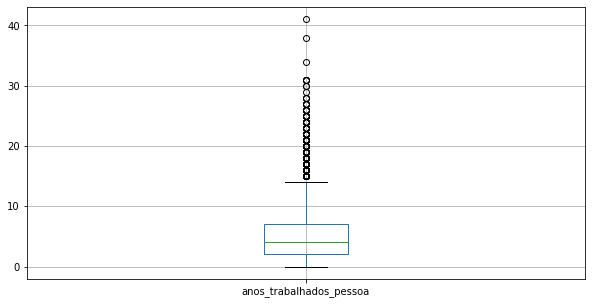

In [86]:
plt.figure(figsize=(10,5))
dados_anos_trabalhados.boxplot(column = ['anos_trabalhados_pessoa'])

In [78]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000
mean,27.713657,65512.577689,4.628583,9543.121986,9.912162,0.217130,0.169382,5.798581
std,6.192302,47095.830324,4.055094,6338.408299,4.506996,0.412298,0.107014,4.046317
min,20.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


O valor do emprestimo não pode ser igual a zero, logo iremos eliminar esses registros. Da mesma maneira a taxa de juros ser zero se tratando de um emprestimo parece ser também um outlier. Vamos tratar essas duas colunas

In [79]:
dados_valor_emprestimo = dados_anos_trabalhados.loc[dados_anos_trabalhados.valor_emprestimo > 0]
dados_taxa_juros = dados_valor_emprestimo.loc[dados_valor_emprestimo.taxa_juros_emprestimo > 0]

In [80]:
dados = dados_taxa_juros

In [81]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29583 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pessoa                      29583 non-null  object 
 1   idade_pessoa                   29583 non-null  int64  
 2   salario_ano_pessoa             29583 non-null  int64  
 3   propriedade_pessoa             29583 non-null  object 
 4   anos_trabalhados_pessoa        29583 non-null  float64
 5   id_emprestimo                  29583 non-null  object 
 6   motivo_emprestimo              29583 non-null  object 
 7   pontuacao_emprestimo           29583 non-null  object 
 8   valor_emprestimo               29583 non-null  int64  
 9   taxa_juros_emprestimo          29583 non-null  float64
 10  status_inadimplencia           29583 non-null  int64  
 11  percentual_emprestimo_salario  29583 non-null  float64
 12  id_historico                   29583 non-null 

In [82]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000
mean,27.699997,65525.552987,4.633911,9583.453335,11.010195,0.218808,0.169739,5.786938
std,6.168867,46921.136552,4.056791,6317.036143,3.239640,0.413445,0.107013,4.026903
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79000.000000,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Agora os Outliers mais claros parecem ter sido removidos, optei por não deletar acima das margens do BoxPlot para considerarmos mais dados para treinar e testar no modelo**